<a href="https://colab.research.google.com/github/ericbonelli/Cientista-de-Dados_EBAC/blob/main/mod12_ex03_regressa%CC%83o_mu%CC%81ltipla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [1]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
from sklearn.metrics import r2_score
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Especialização em IA/Cientista de Dados - Ebac/Desenvolvimento de aplicações com Python/Regressão 1/tips.csv')
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [ ]:
# Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em tip, explicada por sex, smoker, diner e net_bill
y, X = patsy.dmatrices('tip ~ sex + smoker + time + net_bill', tips)
X

DesignMatrix with shape (244, 5)
  Intercept  sex[T.Female]  smoker[T.No]  time[T.Dinner]  net_bill
          1              1             1               1     15.98
          1              0             1               1      8.68
          1              0             1               1     17.51
          1              0             1               1     20.37
          1              1             1               1     20.98
          1              0             1               1     20.58
          1              0             1               1      6.77
          1              0             1               1     23.76
          1              0             1               1     13.08
          1              0             1               1     11.55
          1              0             1               1      8.56
          1              1             1               1     30.26
          1              0             1               1     13.85
          1              0   

In [ ]:
# Gerando o modelo com todas a variáveis
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Mon, 20 Jan 2025   Prob (F-statistic):           2.64e-20
Time:                        22:43:08   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.952      0.000       0.723       1.677
sex[T.Female]     -0.0034      0.156     -0.022      0.982      -0.311       0.305
smoker[T.No]       0.1405      0.151      0.932      0.352      -0.156       0.437
time[T.Dinner]     0.0584      0.168      0.347      0.729      -0.273       0.390
net_bill           0.0995      0.009     10.662      0.000       0.081       0.118
==============================================================================
Omnibus:                       36.537   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.875
Skew:                           0.800   Prob(JB):                     4.96e-15
Kurtosis:                       4.980   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Os resultados do modelo inicial indicam:

Variáveis não significativas: sex[T.Male], smoker[T.Yes], time[T.Lunch] (p-valor > 0.05).

Variável significativa: net_bill (p-valor < 0.001).

In [ ]:
# Gerar o modelo sem a variavel significativas
y_adj, X_adj = patsy.dmatrices('tip ~ net_bill', tips)
model_adj = sm.OLS(y_adj, X_adj).fit()
model_adj.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Mon, 20 Jan 2025   Prob (F-statistic):           5.02e-23
Time:                        22:43:16   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

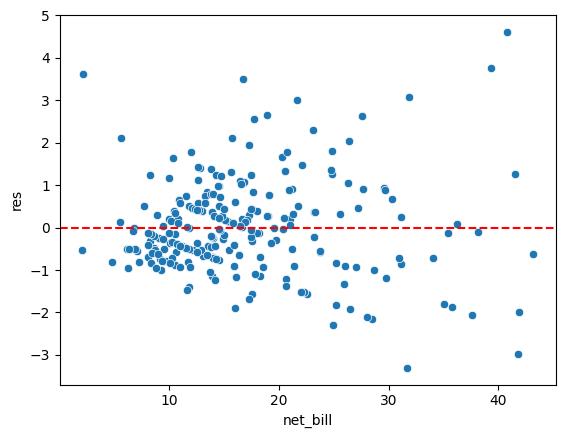

In [ ]:
# gráfico de resíduos em função de net_bill
tips['res'] = model_adj.resid
sns.scatterplot(x = 'net_bill', y = 'res', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

In [ ]:
# teste transformar net_bill no log
tips["log_net_bill"] = np.log(tips["net_bill"])
y_log, X_log = patsy.dmatrices("tip ~ log_net_bill", tips, return_type="dataframe")
model_log = sm.OLS(y_log, X_log).fit()
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     101.0
Date:                Mon, 20 Jan 2025   Prob (F-statistic):           4.40e-20
Time:                        22:43:25   Log-Likelihood:                -382.40
No. Observations:                 244   AIC:                             768.8
Df Residuals:                     242   BIC:                             775.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -1.2575      0.430     -2.924      0.004      -2.104      -0.410
log_net_bill     1.5695      0.156     10.049      0.000       1.262       1.877
==============================================================================
Omnibus:                       73.945   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.148
Skew:                           1.303   Prob(JB):                     9.51e-49
Kurtosis:                       6.868   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Transformar net_bill um polinômio.
y_poly, X_poly = patsy.dmatrices("tip ~ net_bill + I(net_bill**2)", tips, return_type="dataframe")
model_poly = sm.OLS(y_poly, X_poly).fit()
model_poly.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     60.55
Date:                Mon, 20 Jan 2025   Prob (F-statistic):           4.96e-22
Time:                        22:43:29   Log-Likelihood:                -375.28
No. Observations:                 244   AIC:                             756.6
Df Residuals:                     241   BIC:                             767.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.0743      0.353      3.039      0.003       0.378       1.770
net_bill             0.1288      0.037      3.493      0.001       0.056       0.202
I(net_bill ** 2)    -0.0007      0.001     -0.825      0.410      -0.002       0.001
==============================================================================
Omnibus:                       39.745   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.849
Skew:                           0.830   Prob(JB):                     1.25e-17
Kurtosis:                       5.214   Cond. No.                     2.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Compare R² values
r2_values = {
    'Model 1': model.rsquared,
    'Model Adj': model_adj.rsquared,
    'Model Log': model_log.rsquared,
    'Model Poly': model_poly.rsquared
}

print("\nComparação do R²:")
for model_name, r2 in r2_values.items():
    print(f"{model_name}: {r2:.4f}")



Comparação do R²:
Model 1: 0.3352
Model Adj: 0.3325
Model Log: 0.2944
Model Poly: 0.3344


### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [ ]:
# Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de tip, explicado por sex, smoker, diner e net_bill.
y_1, X_1 = patsy.dmatrices('np.log(tip) ~ sex + smoker + time + net_bill', tips)


In [ ]:
# Gerando o modelo com todas a variáveis
model_1 = sm.OLS(y_1, X_1).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     27.25
Date:                Mon, 20 Jan 2025   Prob (F-statistic):           1.21e-18
Time:                        22:44:03   Log-Likelihood:                -97.419
No. Observations:                 244   AIC:                             204.8
Df Residuals:                     239   BIC:                             222.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4504      0.078      5.801      0.000       0.297       0.603
sex[T.Female]      0.0048      0.050      0.097      0.923      -0.094       0.104
smoker[T.No]       0.0436      0.048      0.903      0.367      -0.052       0.139
time[T.Dinner]     0.0191      0.054      0.355      0.723      -0.087       0.125
net_bill           0.0304      0.003     10.152      0.000       0.024       0.036
==============================================================================
Omnibus:                        2.577   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                2.235
Skew:                          -0.181   Prob(JB):                        0.327
Kurtosis:                       3.298   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Gerar o modelo sem a variavel significativas
y_adj_1, X_adj_1 = patsy.dmatrices('np.log(tip) ~ net_bill', tips)
model_adj_1 = sm.OLS(y_adj_1, X_adj_1).fit()
model_adj_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     109.0
Date:                Mon, 20 Jan 2025   Prob (F-statistic):           2.60e-21
Time:                        22:44:07   Log-Likelihood:                -97.886
No. Observations:                 244   AIC:                             199.8
Df Residuals:                     242   BIC:                             206.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4945      0.054      9.172      0.000       0.388       0.601
net_bill       0.0303      0.003     10.442      0.000       0.025       0.036
==============================================================================
Omnibus:                        2.865   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.239   Jarque-Bera (JB):                2.502
Skew:                          -0.215   Prob(JB):                        0.286
Kurtosis:                       3.248   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

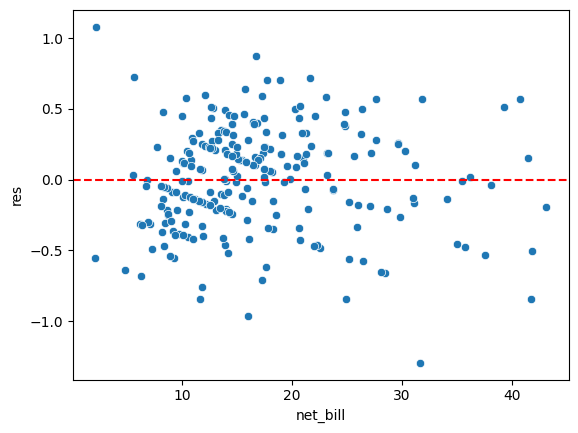

In [ ]:
# gráfico de resíduos em função de net_bill
tips['res'] = model_adj_1.resid
sns.scatterplot(x = 'net_bill', y = 'res', data = tips)
plt.axhline(y=0, color='r', linestyle='--')


In [ ]:
# teste transformar net_bill no log
tips["log_net_bill"] = np.log(tips["net_bill"])
y_log_1, X_log_1 = patsy.dmatrices("np.log(tip) ~ log_net_bill", tips, return_type="dataframe")
model_log_1 = sm.OLS(y_log_1, X_log_1).fit()
model_log_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     113.5
Date:                Mon, 20 Jan 2025   Prob (F-statistic):           5.62e-22
Time:                        22:44:16   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.3942      0.133     -2.961      0.003      -0.657      -0.132
log_net_bill     0.5151      0.048     10.652      0.000       0.420       0.610
==============================================================================
Omnibus:                       12.633   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               28.054
Skew:                           0.141   Prob(JB):                     8.10e-07
Kurtosis:                       4.637   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# teste transformar net_bill um polinômio.
y_poly_1, X_poly_1 = patsy.dmatrices("np.log(tip) ~ net_bill + I(net_bill**2)", tips, return_type="dataframe")
model_poly_1 = sm.OLS(y_poly_1, X_poly_1).fit()
model_poly_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     61.39
Date:                Mon, 20 Jan 2025   Prob (F-statistic):           2.82e-22
Time:                        22:44:20   Log-Likelihood:                -93.026
No. Observations:                 244   AIC:                             192.1
Df Residuals:                     241   BIC:                             202.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.1887      0.111      1.698      0.091      -0.030       0.408
net_bill             0.0655      0.012      5.642      0.000       0.043       0.088
I(net_bill ** 2)    -0.0008      0.000     -3.129      0.002      -0.001      -0.000
==============================================================================
Omnibus:                        5.692   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.058   Jarque-Bera (JB):                7.934
Skew:                          -0.100   Prob(JB):                       0.0189
Kurtosis:                       3.860   Cond. No.                     2.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Compare R² values

r2_values = {
    'Modelo': model_1.rsquared,
    'Modelo Log': model_log_1.rsquared,
    'Modelo Poly': model_poly_1.rsquared
}

print("\nComparação do R²:")
for model_name, r2 in r2_values.items():
    print(f"{model_name}: {r2:.4f}")



Comparação do R²:
Modelo: 0.3132
Modelo Log: 0.3192
Modelo Poly: 0.3375


### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [62]:
data_renda = pd.read_csv('/content/drive/MyDrive/Especialização em IA/Cientista de Dados - Ebac/Desenvolvimento de aplicações com Python/Regressão 1/previsao_de_renda.csv')
data_renda.head()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [63]:
#Verificar dados faltantes e nulos
data_renda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

In [64]:
# eliminar as colunas com dados faltantes
data_renda.dropna(inplace=True)
data_renda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12427 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             12427 non-null  int64  
 1   data_ref               12427 non-null  object 
 2   id_cliente             12427 non-null  int64  
 3   sexo                   12427 non-null  object 
 4   posse_de_veiculo       12427 non-null  bool   
 5   posse_de_imovel        12427 non-null  bool   
 6   qtd_filhos             12427 non-null  int64  
 7   tipo_renda             12427 non-null  object 
 8   educacao               12427 non-null  object 
 9   estado_civil           12427 non-null  object 
 10  tipo_residencia        12427 non-null  object 
 11  idade                  12427 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  12427 non-null  float64
 14  renda                  12427 non-null  float64
dtypes: bool

In [65]:
#Verificar dados duplicados
data_renda.duplicated().sum()
print(f'A base possui {data_renda.duplicated().sum()} dados duplicados')

A base possui 0 dados duplicados


In [66]:
# Ajuste um modelo de regressão linear simples para explicar renda como variável resposta, por tempo_emprego como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
y, X = patsy.dmatrices('renda ~ tempo_emprego', data_renda)
modelo = sm.OLS(y, X).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     2162.
Date:                Thu, 23 Jan 2025   Prob (F-statistic):               0.00
Time:                        19:49:40   Log-Likelihood:            -1.2963e+05
No. Observations:               12427   AIC:                         2.593e+05
Df Residuals:                   12425   BIC:                         2.593e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2177.9041    112.212     19.409

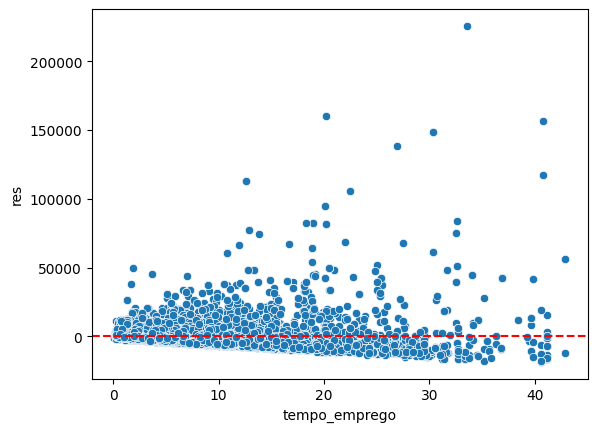

In [67]:
# Faça uma análise de resíduos do modelo
data_renda['res'] = modelo.resid
sns.scatterplot(x='tempo_emprego', y='res', data=data_renda)
plt.axhline(y=0, color='r', linestyle='--')

In [68]:
# teste transformar net_bill no log
data_renda["log_tempo_emprego"] = np.log(data_renda["tempo_emprego"])
y_log, X_log = patsy.dmatrices("renda ~ log_tempo_emprego", data_renda, return_type="dataframe")
modelo_log = sm.OLS(y_log, X_log).fit()
print(modelo_log.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     1250.
Date:                Thu, 23 Jan 2025   Prob (F-statistic):          5.60e-261
Time:                        19:49:50   Log-Likelihood:            -1.3003e+05
No. Observations:               12427   AIC:                         2.601e+05
Df Residuals:                   12425   BIC:                         2.601e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1725.2452    145.62

In [14]:
# teste transformar tempo emprego um polinômio.
y_poly, X_poly = patsy.dmatrices("np.log(renda) ~ tempo_emprego + I(tempo_emprego**2)", data_renda, return_type="dataframe")
modelo_poly = sm.OLS(y_poly, X_poly).fit()
print(modelo_poly.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     1312.
Date:                Thu, 23 Jan 2025   Prob (F-statistic):               0.00
Time:                        18:49:02   Log-Likelihood:                -15125.
No. Observations:               12427   AIC:                         3.026e+04
Df Residuals:                   12424   BIC:                         3.028e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 7.76

In [69]:
# Compare R² values
data_renda['pred_y'] = modelo_poly.fittedvalues
data_renda['pred_y_exp'] = np.exp(modelo_poly.fittedvalues)
data_renda[['pred_y_exp', 'renda']].corr()
R2 = data_renda[['pred_y_exp', 'renda']].corr().iloc[0,1]**2

r2_values = {
    'Modelo': modelo.rsquared,
    'Modelo Log': modelo_log.rsquared,
}

print("\nComparação do R²:")
for model_name, r2 in r2_values.items():
    print(f"{model_name}: {r2:.4f}")

print(f"Na escala de 'renda' (sem o log) para o Modelo Poly: {R2:.4f}")



Comparação do R²:
Modelo: 0.1482
Modelo Log: 0.0914
Na escala de 'renda' (sem o log) para o Modelo Poly: 0.1508


In [30]:
# Transformar as variáveis em Dummmy
data_cleaned = data_renda.drop(columns=["Unnamed: 0", "data_ref", "id_cliente", 'res', 'pred_y', 'pred_y_exp', 'log_tempo_emprego'])
data_cleaned = pd.get_dummies(data_cleaned, drop_first=True)
data_cleaned.head()

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,sexo_M,tipo_renda_Bolsista,tipo_renda_Empresário,...,educacao_Superior incompleto,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
0,False,True,0,26,6.602740,1.0,8060.34,False,False,True,...,False,False,True,False,False,True,False,False,False,False
1,True,True,0,28,7.183562,2.0,1852.15,True,False,False,...,False,False,False,False,False,True,False,False,False,False
2,True,True,0,35,0.838356,2.0,2253.89,False,False,True,...,False,False,False,False,False,True,False,False,False,False
3,False,True,1,30,4.846575,3.0,6600.77,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,True,False,0,33,4.293151,1.0,6475.97,True,False,False,...,False,False,True,False,False,False,False,False,False,True


In [35]:
# 3- Ajuste um modelo de regressão linear múltipla para explicar renda (ou uma transformação de renda) de acordo com as demais variáveis.
data_cleaned.columns = data_cleaned.columns.str.replace(r"[^\w]", "_", regex=True)
data_cleaned['log_renda'] = np.log(data_cleaned['renda'])
formula = 'log_renda ~ ' + ' + '.join(data_cleaned.drop(columns=['renda', 'log_renda']).columns)
modelo_c = smf.ols(formula=formula, data=data_cleaned).fit()
print(modelo_c.summary())

                            OLS Regression Results                            
Dep. Variable:              log_renda   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     287.5
Date:                Thu, 23 Jan 2025   Prob (F-statistic):               0.00
Time:                        19:13:02   Log-Likelihood:                -13568.
No. Observations:               12427   AIC:                         2.719e+04
Df Residuals:                   12402   BIC:                         2.737e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [48]:
# Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
y_adj, X_adj = patsy.dmatrices("np.log(renda) ~ idade + tempo_emprego + posse_de_veiculo + posse_de_imovel + sexo_M + tipo_renda_Empresário", data_cleaned, return_type="dataframe")
modelo_adj = sm.OLS(y_adj, X_adj).fit()
print(modelo_adj.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     1123.
Date:                Thu, 23 Jan 2025   Prob (F-statistic):               0.00
Time:                        19:39:14   Log-Likelihood:                -13624.
No. Observations:               12427   AIC:                         2.726e+04
Df Residuals:                   12420   BIC:                         2.731e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

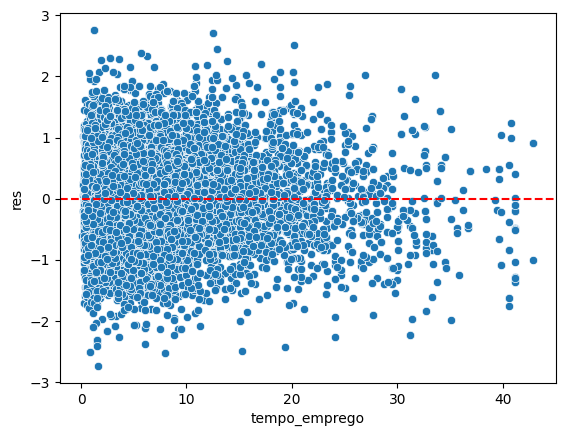

In [52]:
# Faça uma análise de resíduos.
data_cleaned['res'] = modelo_adj.resid
sns.scatterplot(x='tempo_emprego', y='res', data=data_cleaned)
plt.axhline(y=0, color='r', linestyle='--')

In [83]:
# Compare R² values

r2_values = {
    'Modelo Poly(Única Var.)': modelo_poly.rsquared,
    'Modelo Var. Múltiplos': modelo_c.rsquared,
    'Modelo Var. Múltiplos Ajustado': modelo_adj.rsquared
}

print("\nComparação do R²:")
for model_name, r2 in r2_values.items():
    print(f"{model_name}: {r2:.4f}")



Comparação do R²:
Modelo Poly(Única Var.): 0.1744
Modelo Var. Múltiplos: 0.3575
Modelo Var. Múltiplos Ajustado: 0.3517
